In [ ]:
The following consists of the HR data, and criteria and condition due to which the 
employees leave the company and join new one, so we will be creating a model to predict whether
the employee will leave the company or not, the data type is of classification type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
hr=pd.read_csv('hr_data.csv')
hr.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hr['Attrition']=le.fit_transform(hr['Attrition'])
hr['BusinessTravel']=le.fit_transform(hr['BusinessTravel'])
hr['Department']=le.fit_transform(hr['Department'])
hr['EducationField']=le.fit_transform(hr['EducationField'])
hr['Gender']=le.fit_transform(hr['Gender'])
hr['JobRole']=le.fit_transform(hr['JobRole'])
hr['MaritalStatus']=le.fit_transform(hr['MaritalStatus'])
hr['Over18']=le.fit_transform(hr['Over18'])
hr['OverTime']=le.fit_transform(hr['OverTime'])

In [6]:
hr.head(10).dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

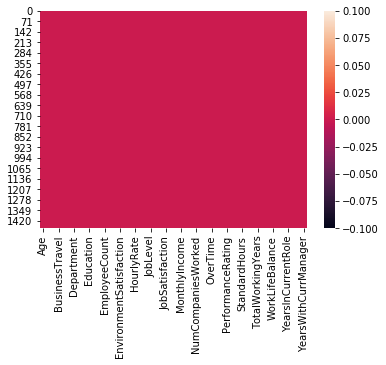

In [7]:
sns.heatmap(hr.isnull())

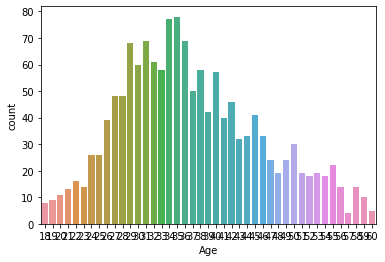

In [8]:
sns.countplot(x='Age', data=hr)

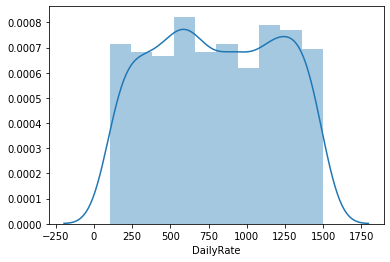

In [9]:
sns.distplot(hr.DailyRate, bins=10)

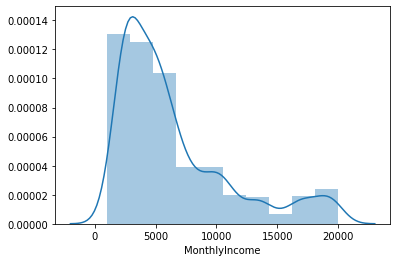

In [10]:
sns.distplot(hr.MonthlyIncome, bins=10)

(array([1244.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         226.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 10 Patch objects>)

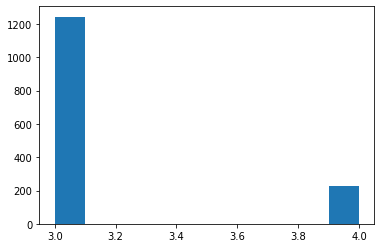

In [11]:
plt.hist(hr.PerformanceRating, bins=10)

(array([ 150.,    0.,    0.,    0.,    0.,  277.,    0.,    0.,    0.,
        1043.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

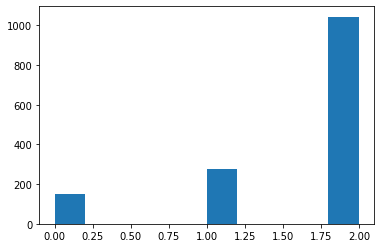

In [12]:
plt.hist(hr.BusinessTravel, bins=10)

In [13]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [14]:
hc=hr.copy()

In [15]:
hc['DistanceFromHome']=np.sqrt(hc['DistanceFromHome'])
hc['JobLevel']=np.sqrt(hc['JobLevel'])
hc['MonthlyIncome']=np.sqrt(hc['MonthlyIncome'])
hc['NumCompaniesWorked']=np.sqrt(hc['NumCompaniesWorked'])
hc['TotalWorkingYears']=np.sqrt(hc['TotalWorkingYears'])
hc['YearsAtCompany']=np.sqrt(hc['YearsAtCompany'])
hc['YearsSinceLastPromotion']=np.sqrt(hc['YearsSinceLastPromotion'])

In [16]:
hc.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

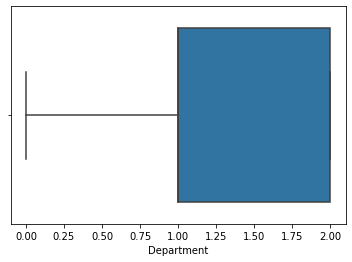

In [17]:
sns.boxplot(hc.Department)

{'whiskers': [<matplotlib.lines.Line2D at 0xc4885c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc488f08>,
 'boxes': [<matplotlib.lines.Line2D at 0xc485a48>],
 'medians': [<matplotlib.lines.Line2D at 0xc48eec8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc493ec8>],
 'means': []}

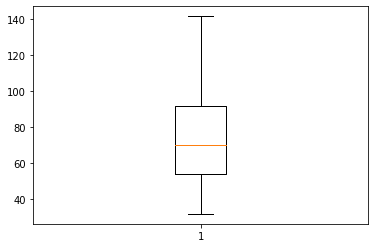

In [18]:
plt.boxplot(hc.MonthlyIncome)

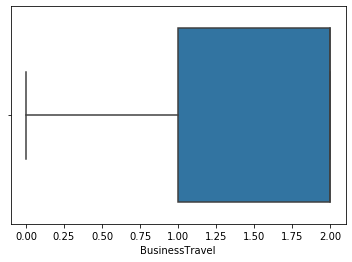

In [19]:
sns.boxplot(hc.BusinessTravel)

In [20]:
hc.corr().head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.013684,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.682115,-0.019621,-0.021490,0.291655,0.212901,0.196728,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.079576,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.208334,-0.059478,-0.063939,-0.178602,-0.160545,-0.049097,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.015805,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.038899,0.015240,-0.011256,-0.010077,-0.011497,-0.031610,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.003880,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.020250,0.002453,-0.037848,-0.018989,0.009932,-0.038077,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.023651,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.009965,0.036875,0.026383,0.019240,0.056315,0.027731,0.034282
DistanceFromHome,-0.013684,0.079576,-0.015805,-0.003880,0.023651,1.000000,0.020829,0.005533,NaN,0.035195,...,0.008395,NaN,0.036655,-0.000272,-0.026869,-0.025353,0.008864,0.012801,0.003526,0.014774
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.020829,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.166427,-0.025100,0.009819,0.065393,0.060236,0.040684,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.005533,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.021133,0.049195,0.041191,-0.009698,-0.010506,0.008178,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.035195,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.007360,0.023603,0.010309,0.003559,-0.008416,0.002747,-0.009197


In [21]:
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
z=np.abs(zscore(hc))
he=hc[(z<3)]
he

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,2.828427,0,1,2.44949,4,0.0,5
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,2.828427,0,1,2.44949,4,0.0,5
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,2.828427,0,1,2.44949,4,0.0,5
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,2.828427,0,1,2.44949,4,0.0,5
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,2.828427,0,1,2.44949,4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,34,0,2,628,1,2.828427,3,3,1,2068,...,1,80,0,2.449490,3,4,2.00000,3,1.0,2
1469,34,0,2,628,1,2.828427,3,3,1,2068,...,1,80,0,2.449490,3,4,2.00000,3,1.0,2
1469,34,0,2,628,1,2.828427,3,3,1,2068,...,1,80,0,2.449490,3,4,2.00000,3,1.0,2
1469,34,0,2,628,1,2.828427,3,3,1,2068,...,1,80,0,2.449490,3,4,2.00000,3,1.0,2


In [22]:
he.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome            float64
Education                     int64
EducationField                int32
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                        int32
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [23]:
x=he.drop(['Attrition','EmployeeCount'],axis=1)
y=he.iloc[:,1]

In [24]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [25]:
from sklearn.decomposition import PCA
pca=PCA()
x_n=pca.fit_transform(x)
x_n

array([[-2.45909785e-01,  4.04304554e-01, -1.82507678e+00, ...,
         1.75649328e-02, -4.24142267e-17, -1.20152238e-16],
       [-2.45909785e-01,  4.04304554e-01, -1.82507678e+00, ...,
         1.75649328e-02, -5.11813569e-17, -1.44988016e-16],
       [-2.45909785e-01,  4.04304554e-01, -1.82507678e+00, ...,
         1.75649328e-02, -6.18454128e-17, -1.75197459e-16],
       ...,
       [-9.05301845e-01,  4.03105609e-01, -5.83229287e-01, ...,
         3.30513358e-01,  9.90524363e-19,  2.80598583e-18],
       [-9.05301845e-01,  4.03105609e-01, -5.83229287e-01, ...,
         3.30513358e-01,  9.90524363e-19,  2.80598583e-18],
       [-9.05301845e-01,  4.03105609e-01, -5.83229287e-01, ...,
         3.30513358e-01,  9.90524363e-19,  2.80598583e-18]])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
max_scr=0
for r_state in range(42,100):
    x_n_train,x_n_test,y_train,y_test=train_test_split(x_n,y,random_state=r_state, test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_n_train,y_train)
    y_pred=lg.predict(x_n_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('Final rstate corresponding to',final_rstate, 'max accuracy score is', max_scr)

Final rstate corresponding to 80 max accuracy score is 0.8825656845016487


In [27]:
from sklearn.model_selection import cross_val_score
crss_val_scr=cross_val_score(lg,x_n,y, scoring='accuracy', cv=5).mean()
crss_val_scr

0.8683913934008831

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
lg=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gn=GaussianNB()

In [30]:
model=[]
model.append((lg,'Logistic Regression'))
model.append((svc,'SVC'))
model.append((dtc,'Decision Tree Classifier'))
model.append((knn,'KNeighbors Classifier'))
model.append((gn,'GussianNB'))

In [31]:
from sklearn.metrics import roc_curve,auc, roc_auc_score

************* Logistic Regression ***************
Accuracy score 0.8732049781938092


Cross_val_Score 0.8683913934008831


roc_curve 0.6690950457754138
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7856
           1       0.73      0.37      0.49      1545

    accuracy                           0.87      9401
   macro avg       0.81      0.67      0.71      9401
weighted avg       0.86      0.87      0.86      9401



Confusion_matrix [[7645  211]
 [ 981  564]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


************* SVC ***************
Accuracy score 1.0


Cross_val_Score 0.8563920293676318


roc_curve 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7856
           1       1.00      1.00      1.00      1545

    accuracy                           1.00      9401
   macro avg       1.00      1.00      1.00      9401
weighted avg       1.00      1.00      1.00      9

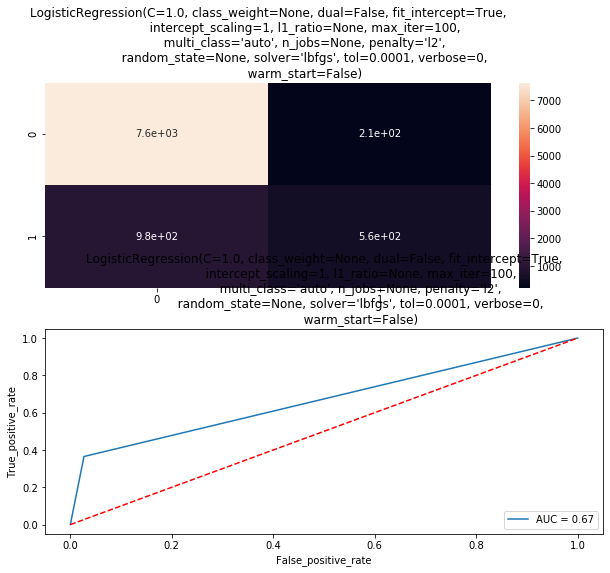

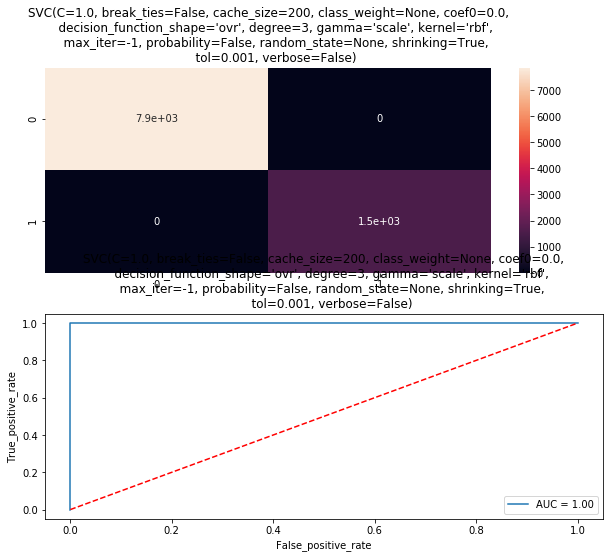

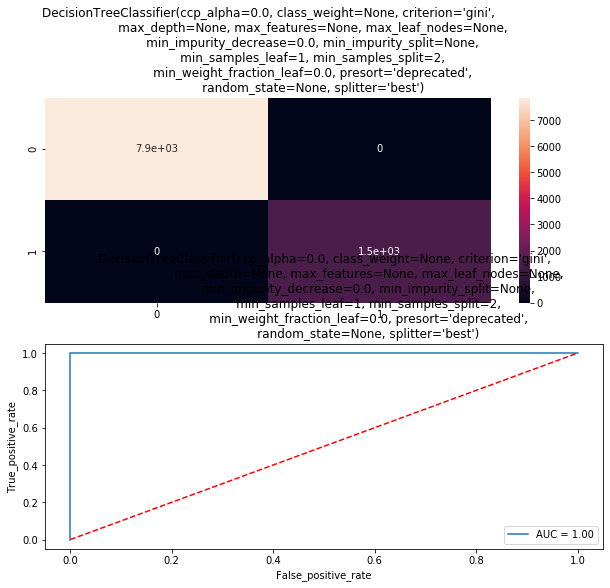

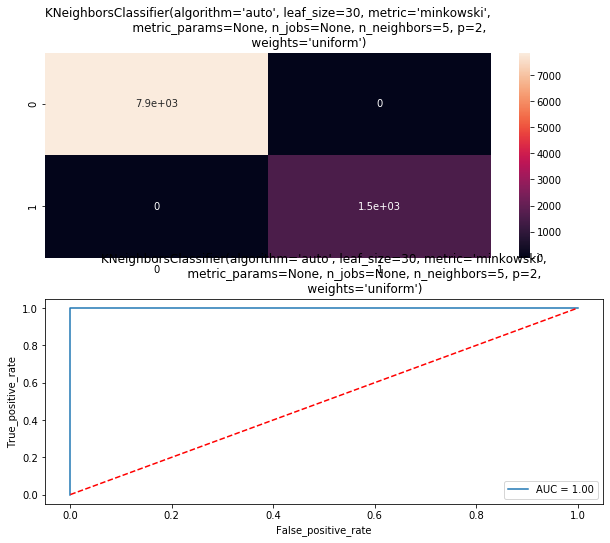

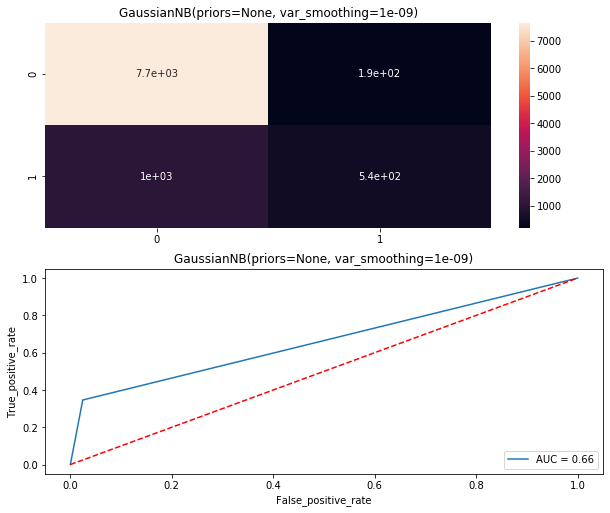

In [34]:
for m,model_name in model:
    print('*************',model_name,'***************')
    m.fit(x_n_train,y_train)
    y_pred=m.predict(x_n_test)
    acc_scr=accuracy_score(y_test,y_pred)
    print('Accuracy score',acc_scr)
    print('\n')
    cross_val_scr=cross_val_score(m,x_n,y, scoring='accuracy', cv=5).mean()
    print('Cross_val_Score',cross_val_scr)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_curve',roc_auc)
    print(classification_report(y_test,y_pred))
    print('\n')
    cms=confusion_matrix(y_test,y_pred)
    print('Confusion_matrix',cms)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cms,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate,label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n')
    

In [35]:
df1=pd.DataFrame(y_pred)
df1.to_csv('knn_prediction.csv')

In [36]:
from sklearn.externals import joblib
joblib.dump(knn,'knn_HR.pkl')

['knn_HR.pkl']

In [ ]:
After analyzing the whole model, we saw that KNeighbors Classifier gave better results 
in all aspect from accuracy score to roc curve, so the model was saved.

In [ ]:
hc